In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("Hiring_Challenge.csv")

In [3]:
df.head()

C1     C2     C3 C4 C5 C6 C7    C8 C9 C10  C11 C12 C13  C14  C15  Hired
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202    0      1
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43  560      1
2  a   24.5  0.500  u  g  q  h  1.50  t   f    0   f   g  280  824      1
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100    3      1
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120    0      1

In [4]:
df.tail()

C1     C2      C3 C4 C5  C6  C7    C8 C9 C10  C11 C12 C13  C14  C15  Hired
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260    0      0
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200  394      0
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200    1      0
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280  750      0
689  b     35   3.375  u  g   c   h  8.29  f   f    0   t   g    0    0      0

In [5]:
df.describe().T

count         mean          std  min    25%   50%       75%       max
C3     690.0     4.758725     4.978163  0.0  1.000  2.75    7.2075      28.0
C8     690.0     2.223406     3.346513  0.0  0.165  1.00    2.6250      28.5
C11    690.0     2.400000     4.862940  0.0  0.000  0.00    3.0000      67.0
C15    690.0  1017.385507  5210.102598  0.0  0.000  5.00  395.5000  100000.0
Hired  690.0     0.444928     0.497318  0.0  0.000  0.00    1.0000       1.0

In [6]:
continuous_columns=['C2','C3','C8','C11','C14','C15']
categorical_columns=['C1','C4','C5','C6','C7','C9','C10','C12','C13']

# Exploratory Data Analysis

In [7]:
# Summarize our dataset 
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  690
Columns  :  16

Features : 
 ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'Hired']

Missing values :   0

Unique values :  
 C1         3
C2       350
C3       215
C4         4
C5         4
C6        15
C7        10
C8       132
C9         2
C10        2
C11       23
C12        2
C13        3
C14      171
C15      240
Hired      2
dtype: int64


In [8]:
df.isnull().sum().values.sum()

0

In [9]:
df.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

In [10]:
df_process=df.copy()

# Handling Null values

In [11]:
df[df['C2']=='?']['C2']

83     ?
86     ?
92     ?
97     ?
254    ?
286    ?
329    ?
445    ?
450    ?
500    ?
515    ?
608    ?
Name: C2, dtype: object

In [12]:
df[df['C14']=='?']['C14']

71     ?
202    ?
206    ?
243    ?
270    ?
278    ?
330    ?
406    ?
445    ?
456    ?
592    ?
622    ?
626    ?
Name: C14, dtype: object

In [13]:
#df_process["C2"].replace({"?": None}, inplace=True)
df_process["C2"]=df_process["C2"].apply(lambda x: None if x=='?' else x )

In [14]:
df_process["C14"]=df_process["C14"].apply(lambda x: None if x=='?' else x )

In [15]:
df_process[df_process['C14']=='?']['C14']

Series([], Name: C14, dtype: object)

In [16]:
df_process[df_process['C2']=='?']['C2']

Series([], Name: C2, dtype: object)

In [17]:
for d in df.columns:#df_process[df_process['C1']=='?']['C1']
    df_process[d]=df_process[d].apply(lambda x: None if x=='?' else x )

In [18]:
df_process[df_process['C4']=='?']['C4']

Series([], Name: C4, dtype: object)

In [19]:
df_process.isnull().sum()

C1       12
C2       12
C3        0
C4        6
C5        6
C6        9
C7        9
C8        0
C9        0
C10       0
C11       0
C12       0
C13       0
C14      13
C15       0
Hired     0
dtype: int64

In [20]:
df_process.shape

(690, 16)

In [21]:
df_process['C2'] = df_process['C2'].astype(float)

In [22]:
df_process['C14'] = df_process['C14'].astype(float)

In [23]:
df_process.describe().T

count         mean          std    min      25%     50%       75%  \
C2     678.0    31.568171    11.957862  13.75  22.6025   28.46   38.2300   
C3     690.0     4.758725     4.978163   0.00   1.0000    2.75    7.2075   
C8     690.0     2.223406     3.346513   0.00   0.1650    1.00    2.6250   
C11    690.0     2.400000     4.862940   0.00   0.0000    0.00    3.0000   
C14    677.0   184.014771   173.806768   0.00  75.0000  160.00  276.0000   
C15    690.0  1017.385507  5210.102598   0.00   0.0000    5.00  395.5000   
Hired  690.0     0.444928     0.497318   0.00   0.0000    0.00    1.0000   

             max  
C2         80.25  
C3         28.00  
C8         28.50  
C11        67.00  
C14      2000.00  
C15    100000.00  
Hired       1.00

In [24]:
df_process.dtypes

C1        object
C2       float64
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14      float64
C15        int64
Hired      int64
dtype: object

In [25]:
correlation=df_process.corr()

In [26]:
correlation

C2        C3        C8       C11       C14       C15     Hired
C2     1.000000  0.202317  0.395751  0.185912 -0.079812  0.018553  0.162881
C3     0.202317  1.000000  0.298902  0.271207 -0.224242  0.123121  0.206294
C8     0.395751  0.298902  1.000000  0.322330 -0.077163  0.051345  0.322475
C11    0.185912  0.271207  0.322330  1.000000 -0.120096  0.063692  0.406410
C14   -0.079812 -0.224242 -0.077163 -0.120096  1.000000  0.066853 -0.100935
C15    0.018553  0.123121  0.051345  0.063692  0.066853  1.000000  0.175657
Hired  0.162881  0.206294  0.322475  0.406410 -0.100935  0.175657  1.000000

<AxesSubplot:>

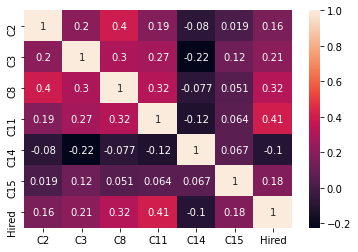

In [27]:
sns.heatmap(correlation,annot=True)

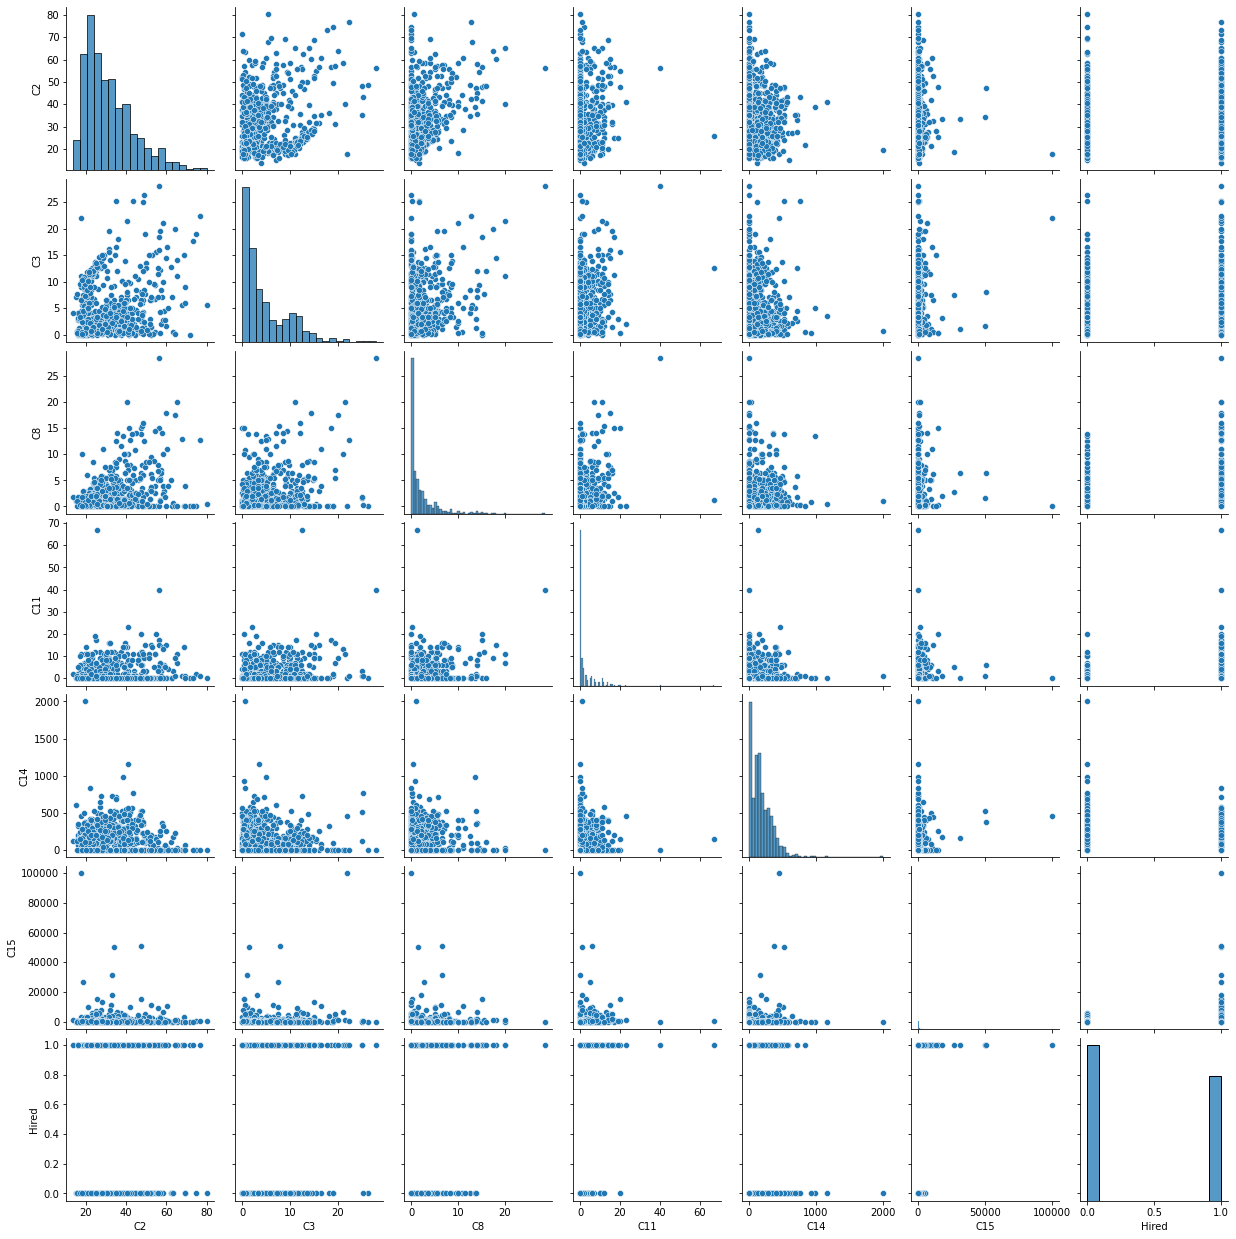

In [28]:
sns.pairplot(df_process)

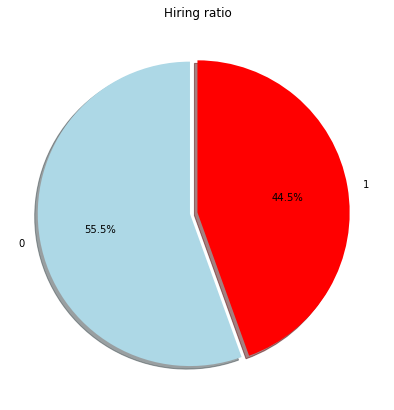

In [29]:
from pylab import rcParams 

# Data to plot
labels = df_process['Hired'].value_counts(sort = True).index
sizes = df_process['Hired'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Hiring ratio')
plt.show()

In [30]:
from sklearn.impute import SimpleImputer
Columns=['C2','C4','C5','C6','C7','C14']


In [31]:
df_process['C1'].value_counts().head(1).values[0]

468

In [32]:
df_process['C2'].value_counts().head(1).values[0]

9

In [33]:
cat_column=['C1','C4','C5','C6','C7']
for c in cat_column:
    print('Column',c)
    print(df_process[c].value_counts())

Column C1
b    468
a    210
Name: C1, dtype: int64
Column C4
u    519
y    163
l      2
Name: C4, dtype: int64
Column C5
g     519
p     163
gg      2
Name: C5, dtype: int64
Column C6
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: C6, dtype: int64
Column C7
v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: C7, dtype: int64


# Applying most common value to missing records 

In [34]:
for c in cat_column:
    print(df_process[c].value_counts().head(1))
    df_process[c].fillna( method ='ffill', inplace = True) 
    #df_process[c]=df_process[c].apply(lambda x: most_used  if x is None  else x )

b    468
Name: C1, dtype: int64
u    519
Name: C4, dtype: int64
g    519
Name: C5, dtype: int64
c    137
Name: C6, dtype: int64
v    399
Name: C7, dtype: int64


In [35]:
for c in cat_column:
    print('Column',c)
    print(df_process[c].value_counts())

Column C1
b    476
a    214
Name: C1, dtype: int64
Column C4
u    524
y    164
l      2
Name: C4, dtype: int64
Column C5
g     524
p     164
gg      2
Name: C5, dtype: int64
Column C6
c     139
q      80
w      66
i      61
aa     54
ff     53
k      52
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: C6, dtype: int64
Column C7
v     403
h     140
bb     60
ff     57
j       9
z       8
dd      6
n       5
o       2
Name: C7, dtype: int64


In [36]:
df_process[df_process['C14'].isnull()]

C1     C2      C3 C4 C5  C6  C7      C8 C9 C10  C11 C12 C13  C14    C15  \
71   b  34.83   4.000  u  g   d  bb  12.500  t   f    0   t   g  NaN      0   
202  b  24.83   2.750  u  g   c   v   2.250  t   t    6   f   g  NaN    600   
206  a  71.58   0.000  u  g   q   h   0.000  f   f    0   f   p  NaN      0   
243  a  18.75   7.500  u  g   q   v   2.710  t   t    5   f   g  NaN  26726   
270  b  37.58   0.000  u  g   q   n   0.000  f   f    0   f   p  NaN      0   
278  b  24.58  13.500  y  p  ff  ff   0.000  f   f    0   f   g  NaN      0   
330  b  20.42   0.000  y  p   i   v   0.000  f   f    0   f   p  NaN      0   
406  a  40.33   8.125  y  p   k   v   0.165  f   t    2   f   g  NaN     18   
445  a    NaN  11.250  u  g  ff  ff   0.000  f   f    0   f   g  NaN   5200   
456  b  34.58   0.000  u  g   w   v   0.000  f   f    0   f   p  NaN      0   
592  b  23.17   0.000  u  g   c   h   0.000  f   f    0   f   p  NaN      0   
622  a  25.58   0.000  u  g   c   j   0.000  f   f    0   f   p  NaN      0   
626  b  22.00   7.835  y  p   i  bb   0.165  f   f    0   t   g  NaN      0   

     Hired  
71       0  
202      1  
206      1  
243      1  
270      1  
278      0  
330      0  
406      0  
445      0  
456      0  
592      1  
622      1  
626      0

# Replacing None with mean for columns having continuous values

In [37]:
conti_column=['C2','C14']



In [38]:
for c in conti_column:
    mean_ofcolumn=df_process[c].mean()
    print(mean_ofcolumn)
    df_process[c] = df_process[c].fillna((df_process[c].mean()))
for c in conti_column:
    print('columns',c)
    print(df_process[c].unique())

31.56817109144546
184.01477104874445
columns C2
[30.83       58.67       24.5        27.83       20.17       32.08
 33.17       22.92       54.42       42.5        22.08       29.92
 38.25       48.08       45.83       36.67       28.25       23.25
 21.83       19.17       25.         47.75       27.42       41.17
 15.83       47.         56.58       57.42       42.08       29.25
 42.         49.5        36.75       22.58       27.25       23.
 27.75       54.58       34.17       28.92       29.67       39.58
 56.42       54.33       41.         31.92       41.5        23.92
 25.75       26.         37.42       34.92       34.25       23.33
 23.17       44.33       35.17       43.25       56.75       31.67
 23.42       20.42       26.67       36.         25.5        19.42
 32.33       34.83       38.58       44.25       44.83       20.67
 34.08       21.67       21.5        49.58       27.67       39.83
 31.56817109 37.17       25.67       34.         49.         62.5
 31.42       52.3

In [39]:
df_process.dtypes

C1        object
C2       float64
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14      float64
C15        int64
Hired      int64
dtype: object

In [40]:
df_process.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

# Checking Outliers via histogram

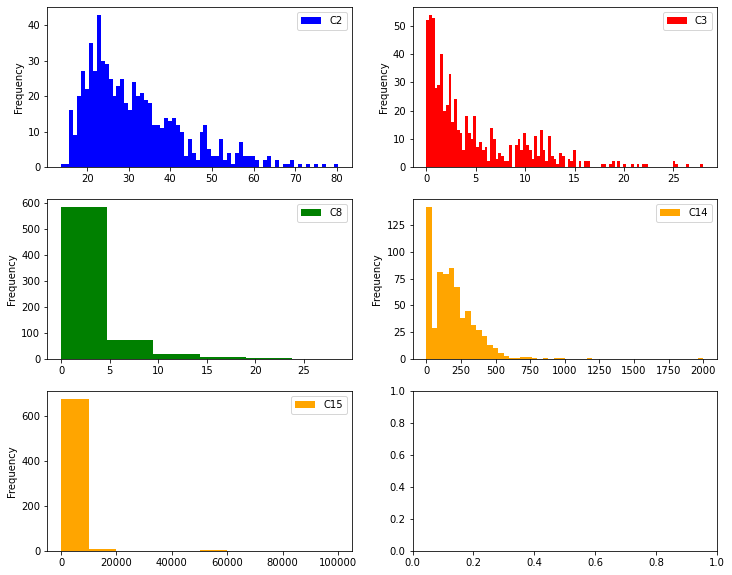

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
df_process.plot(kind="hist", y="C2", bins=70, color="b", ax=axes[0][0])
df_process.plot(kind="hist", y="C3", bins=100, color="r", ax=axes[0][1])
df_process.plot(kind="hist", y="C8", bins=6, color="g", ax=axes[1][0])
df_process.plot(kind="hist", y="C14", bins=50, color="orange", ax=axes[1][1])
df_process.plot(kind="hist", y="C15", bins=10, color="orange", ax=axes[2][0])
plt.show()


C:\Users\deesaw\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


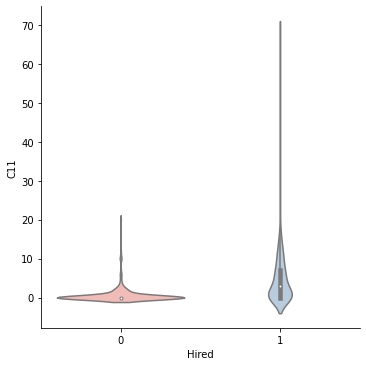

In [42]:
# Let's look at Tenure
g = sns.factorplot(x="Hired", y = "C11",data = df_process, kind="violin", palette = "Pastel1")

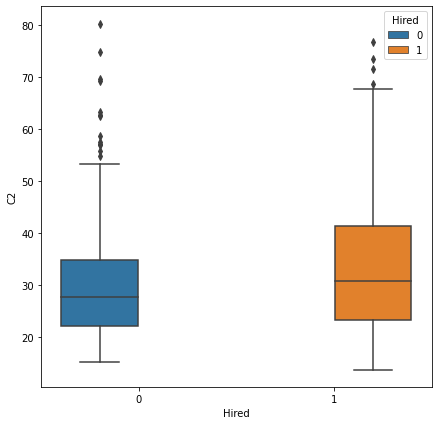

In [43]:
sns.boxplot(x="Hired", y = "C2",data = df_process,hue="Hired")
plt.show()

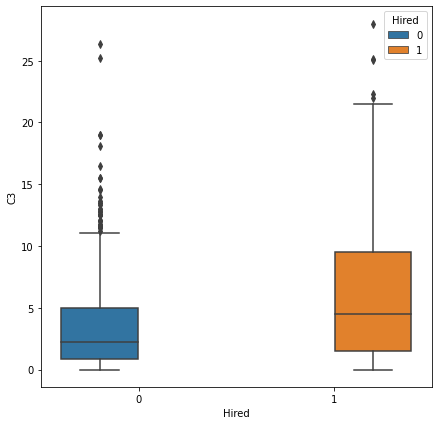

In [44]:
sns.boxplot(x="Hired", y = "C3",data = df_process,hue="Hired")
plt.show()

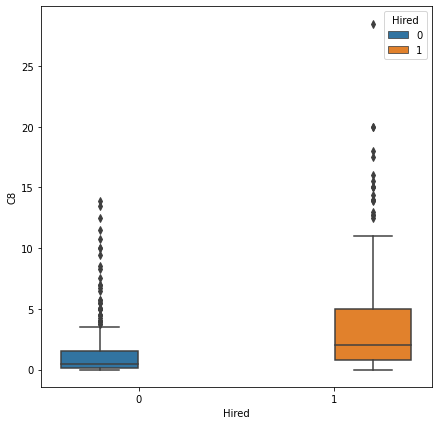

In [45]:
sns.boxplot(x="Hired", y = "C8",data = df_process,hue="Hired")
plt.show()


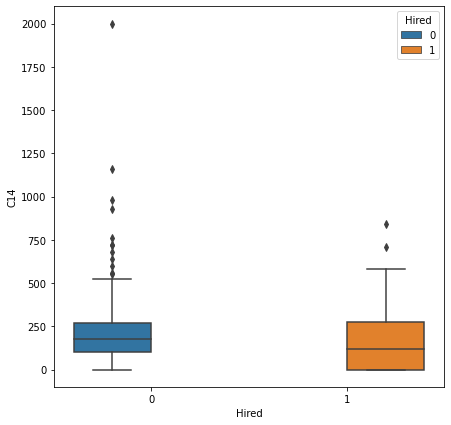

In [46]:
sns.boxplot(x="Hired", y = "C14",data = df_process,hue="Hired")
plt.show()

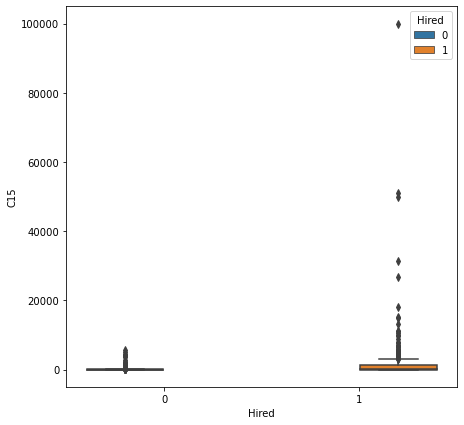

In [47]:
sns.boxplot(x="Hired", y = "C15",data = df_process,hue="Hired")
plt.show()

# Based on the above diagrams these are the outliers C15>10000,C14>2000,C8>25

In [48]:
df_process[df_process['C15']>=100000]

C1    C2    C3 C4  C5  C6 C7   C8 C9 C10  C11 C12 C13    C14     C15  \
317  b  17.5  22.0  l  gg  ff  o  0.0  f   f    0   t   p  450.0  100000   

     Hired  
317      1

In [49]:
df_process[df_process['C14']>=2000]

C1     C2     C3 C4 C5 C6 C7   C8 C9 C10  C11 C12 C13     C14  C15  Hired
407  a  19.58  0.665  y  p  c  v  1.0  f   t    1   f   g  2000.0    2      0

In [50]:
df_process[df_process['C8']>=25]

C1     C2    C3 C4 C5 C6 C7    C8 C9 C10  C11 C12 C13  C14  C15  Hired
44  b  56.42  28.0  y  p  c  v  28.5  t   t   40   f   g  0.0   15      1

In [51]:
df_process.shape

(690, 16)

In [52]:
df_process=df_process[df_process['C15']<100000]

In [53]:
df_process.shape

(689, 16)

In [54]:
df_process=df_process[df_process['C14']<2000]
df_process.shape

(688, 16)

In [55]:
df_process=df_process[df_process['C8']<28]
df_process.shape

(687, 16)

# Coorelation of C14 and C11 is high

<AxesSubplot:>

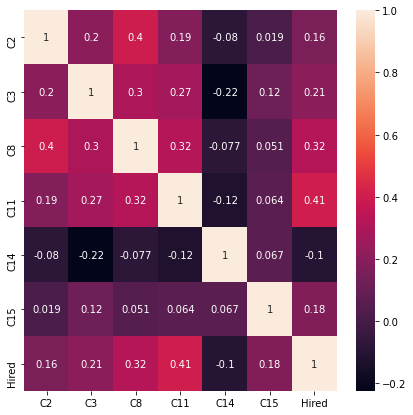

In [56]:
sns.heatmap(correlation,annot=True)

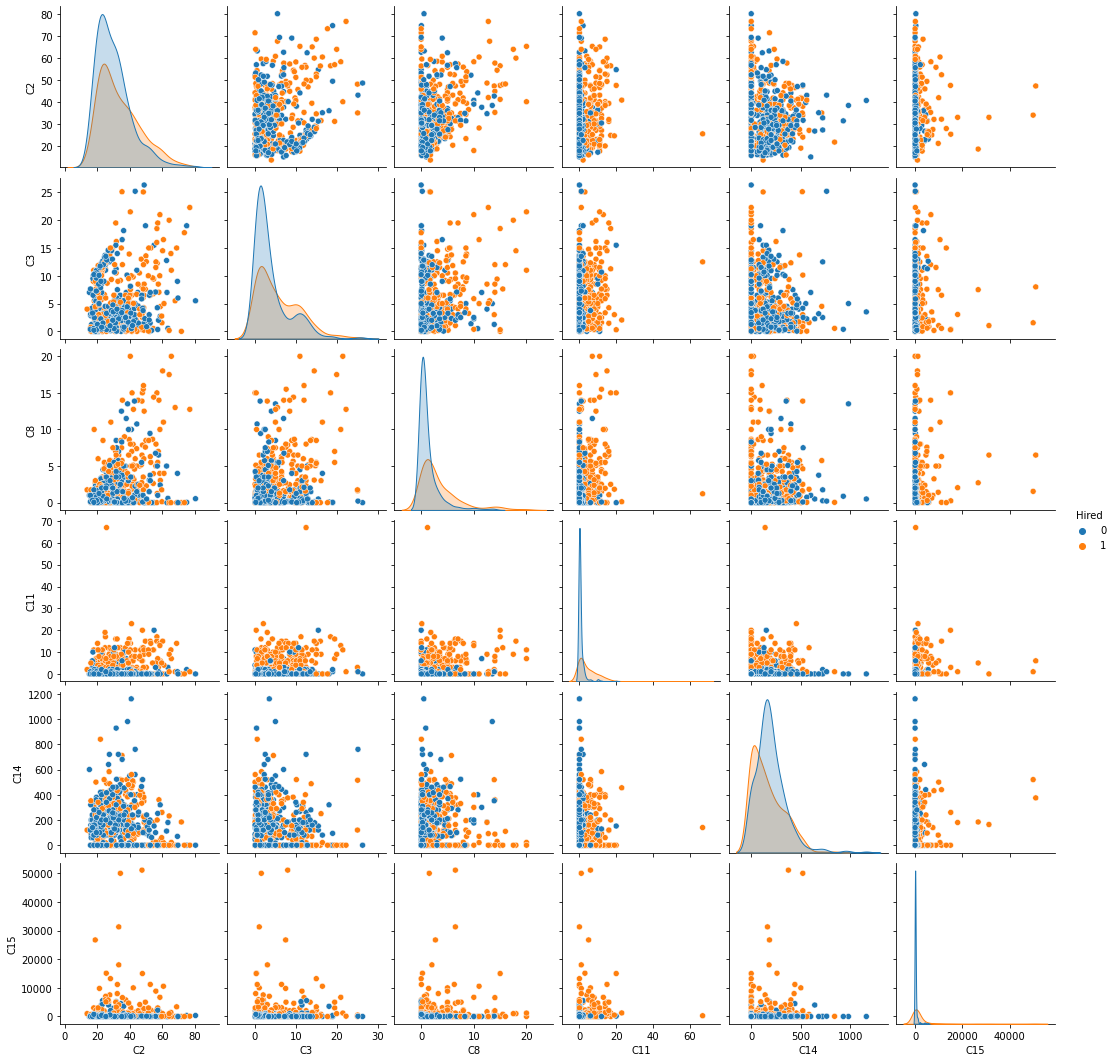

In [57]:
sns.pairplot(df_process,hue='Hired')

In [58]:
df_process.dtypes

C1        object
C2       float64
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14      float64
C15        int64
Hired      int64
dtype: object

In [59]:
columns=['C1','C4','C5','C6','C7','C9','C10','C12','C13']
summary = pd.concat([pd.crosstab(df_process[x], df_process.Hired) for x in columns], keys=columns)
summary

Hired     0    1
C1  a   113  100
    b   269  205
C4  l     0    1
    u   264  260
    y   118   44
C5  g   264  260
    gg    0    1
    p   118   44
C6  aa   35   19
    c    74   63
    cc   12   29
    d    23    7
    e    11   14
    ff   46    6
    i    47   14
    j     7    3
    k    38   14
    m    22   16
    q    27   53
    r     1    2
    w    33   33
    x     6   32
C7  bb   35   25
    dd    4    2
    ff   49    8
    h    51   89
    j     5    4
    n     2    3
    o     1    0
    v   233  168
    z     2    6
C9  f   305   22
    t    77  283
C10 f   297   97
    t    85  208
C12 f   212  160
    t   170  145
C13 g   337  286
    p     3    4
    s    42   15

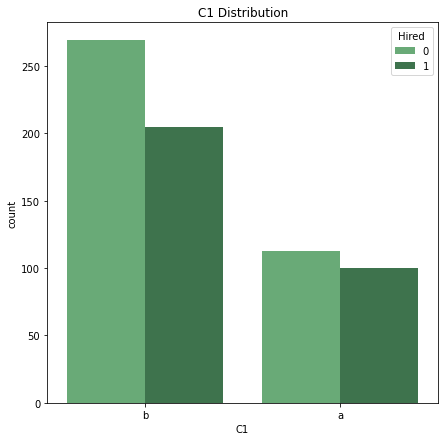

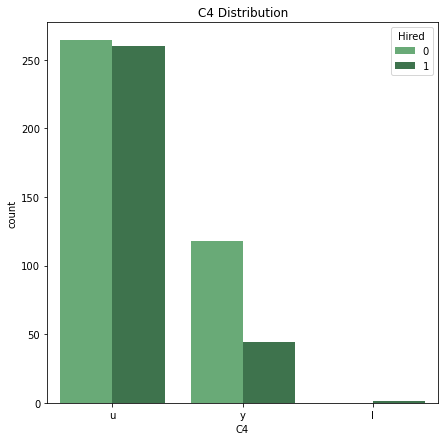

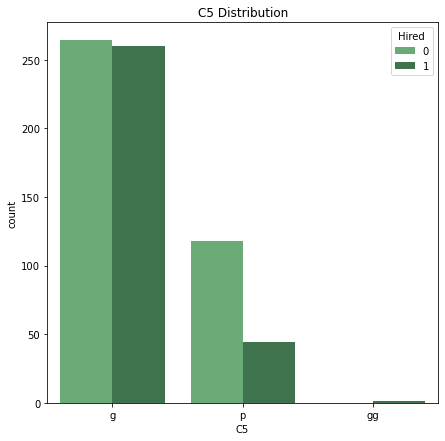

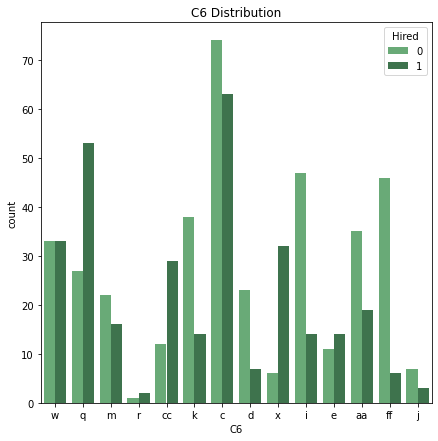

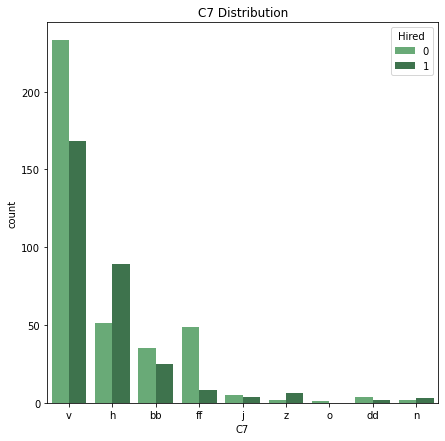

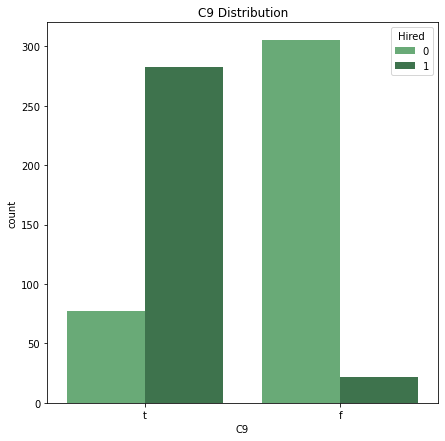

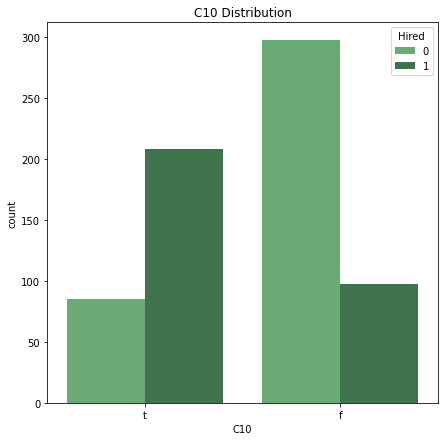

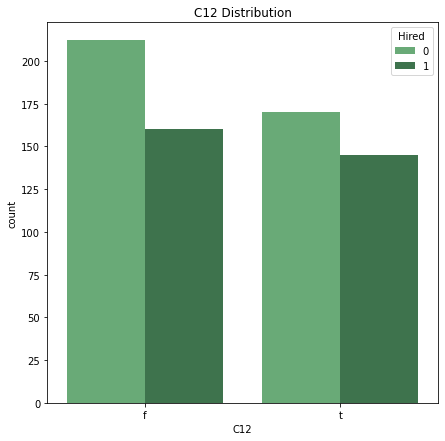

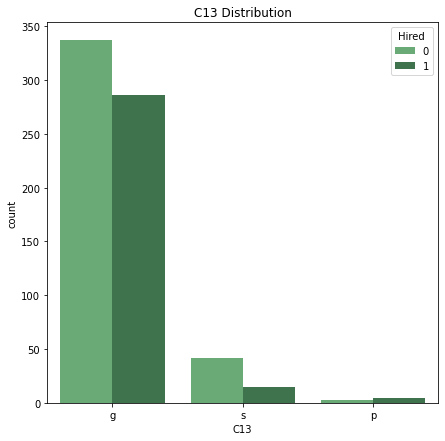

In [60]:
columns=['C1','C4','C5','C6','C7','C9','C10','C12','C13']
for c in columns:
    sns.countplot(x=c,hue='Hired',data=df_process,palette="Greens_d")
    plt.title(c+" Distribution")
    plt.show()

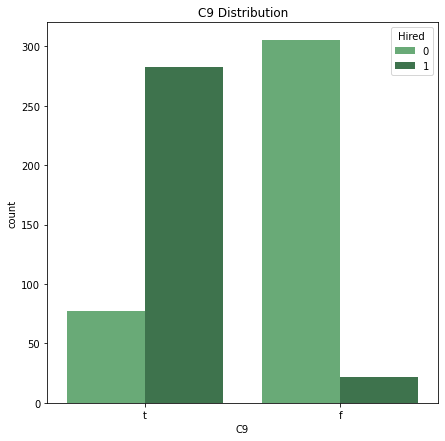

In [122]:
    sns.countplot(x='C9',hue='Hired',data=df_process,palette="Greens_d")
    plt.title("C9 Distribution")
    plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,average_precision_score,classification_report,f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [62]:
X=df_process.iloc[:,:-1]
y=df_process.iloc[:,-1]

In [63]:
y.shape

(687,)

In [64]:
X

C1     C2      C3 C4 C5  C6  C7    C8 C9 C10  C11 C12 C13    C14  C15
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0

[687 rows x 15 columns]

In [65]:
y

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Hired, Length: 687, dtype: int64

# OneHotEncoding 

# Either drop ='First' or handle_unknown='ignore' can be used while onehot encoding,I choose handle_unknown='ignore' as infuture we can have some more categories.We can use drop option too and avoid Dummy variable trap

In [66]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), [0,3,4,5,6,8,9,11,12])], remainder='passthrough')


In [67]:
X_Processed = ct.fit_transform(X)

In [68]:
X

C1     C2      C3 C4 C5  C6  C7    C8 C9 C10  C11 C12 C13    C14  C15
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0

[687 rows x 15 columns]

In [69]:
X_Processed[0]

array([  0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   1.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
        30.83,   0.  ,   1.25,   1.  , 202.  ,   0.  ])

In [70]:
y

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Hired, Length: 687, dtype: int64

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_Processed,y, test_size=0.20, random_state=42)

In [72]:
X_train.shape

(549, 46)

In [73]:
y_train.shape

(549,)

In [74]:
X_test.shape

(138, 46)

In [75]:
y_test.shape

(138,)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score,average_precision_score,classification_report,f1_score
def classi_metrics(model,X,y):
    accuracy=accuracy_score(y,model.predict(X))
    f1=f1_score(y,model.predict(X))
    report=classification_report(y,model.predict(X))
    print('accuracy :{}'.format(accuracy))
    print('f1_score :{}'.format(f1))
    print('classification_report :{}'.format(report))


In [78]:
pipeline_RandomForestClassifier=Pipeline([('RandomForestClassifier1',RandomForestClassifier(random_state=0))])
pipeline_svc=Pipeline([('SVC1',SVC(C=1.0, kernel='rbf'))])
pipeline_Naivebayes=Pipeline([('GaussianNB1',GaussianNB())])
pipeline_DecisionTreeClassifier=Pipeline([('DecisionTreeClassifier1',DecisionTreeClassifier(random_state=0))])
pipeline_LogisticRegression=Pipeline([('LogisticRegression1',LogisticRegression(max_iter=10000,random_state=0) )] )
pipeline_XGBClassifier=Pipeline([('XGBClassifier1',XGBClassifier(learning_rate=0.4,random_state=0))])

                         
pipelines = [pipeline_RandomForestClassifier, pipeline_svc, pipeline_Naivebayes,pipeline_DecisionTreeClassifier,pipeline_LogisticRegression,pipeline_XGBClassifier]

In [79]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'RandomForestClassifier', 1: 'SVC', 2: 'Naive bayes GaussianNB' ,3 :'DecisionTreeClassifier',4:'LogisticRegression',5:'XGBClassifier'}

In [80]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [81]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    classi_metrics(model,X_test,y_test)

RandomForestClassifier 
accuracy :0.855072463768116
f1_score :0.84375
classification_report :              precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.84      0.84      0.84        64

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138

SVC 
accuracy :0.6666666666666666
f1_score :0.4772727272727273
classification_report :              precision    recall  f1-score   support

           0       0.62      0.96      0.76        74
           1       0.88      0.33      0.48        64

    accuracy                           0.67       138
   macro avg       0.75      0.64      0.62       138
weighted avg       0.74      0.67      0.63       138

Naive bayes GaussianNB 
accuracy :0.8260869565217391
f1_score :0.8064516129032259
classification_report :              precision    recall  f1-score   support

       

In [123]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    cv_scores = cross_val_score(model,X_train,y_train,cv=10, scoring='accuracy')
    print(" cvscore : {} ".format(np.mean((cv_scores))) )

RandomForestClassifier 
 cvscore : 0.878047138047138 
SVC 
 cvscore : 0.67020202020202 
Naive bayes GaussianNB 
 cvscore : 0.8395959595959598 
DecisionTreeClassifier 
 cvscore : 0.8489225589225591 
LogisticRegression 
 cvscore : 0.858013468013468 
XGBClassifier 
 cvscore : 0.8671380471380472 


# As per classification report and cross validation score Random forest seems to be the best algorithm we will try to fine tune it using Grid Search Cv

In [83]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[100,120,140,160,170,200,250,260,270,300],'criterion' :['entropy','manhattan','gini'],'max_depth' :[55,60,70,80,90,100,150]}]
grid_search = GridSearchCV(estimator = pipeline_RandomForestClassifier['RandomForestClassifier1'], param_grid = parameters,scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search = grid_search.fit(X_test, y_test)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.75 %
Best Parameters: {'criterion': 'gini', 'max_depth': 55, 'n_estimators': 120}


# Random Forest

In [84]:
rf=RandomForestClassifier(criterion= 'gini', max_depth= 55, n_estimators=120)

In [85]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=55, n_estimators=120)

In [86]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  

In [87]:
cross_val=cross_val_score(rf,X_test, y_test,cv=10,scoring='accuracy').mean()
print(cross_val)

0.8846153846153847


In [88]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.85      0.86      0.85        64

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



In [89]:
confusion_matrix(y_test,rf.predict(X_test))

array([[64, 10],
       [ 9, 55]], dtype=int64)

# 2) feature selection and random forest classification

In [90]:
X_processed9=X.loc[:,['C2','C3','C8','C11','C14','C15']]

In [91]:
X_processed9.shape

(687, 6)

In [92]:
# Encoding categorical data
C1=pd.get_dummies(X['C1'],prefix='C1',drop_first=True)
C4=pd.get_dummies(X['C4'],prefix='C4',drop_first=True)
C5=pd.get_dummies(X['C5'],prefix='C5',drop_first=True)
C6=pd.get_dummies(X['C6'],prefix='C6',drop_first=True)
C7=pd.get_dummies(X['C7'],prefix='C7',drop_first=True)
C9=pd.get_dummies(X['C9'],prefix='C9',drop_first=True)
C10=pd.get_dummies(X['C10'],prefix='C10',drop_first=True)
C12=pd.get_dummies(X['C12'],prefix='C12',drop_first=True)
C13=pd.get_dummies(X['C13'],prefix='C13',drop_first=True)


In [93]:
X_processed4=pd.concat([X_processed9,C1,C4,C5,C6,C7,C9,C10,C12,C13],axis=1)


In [94]:
X_processed4.columns

Index(['C2', 'C3', 'C8', 'C11', 'C14', 'C15', 'C1_b', 'C4_u', 'C4_y', 'C5_gg',
       'C5_p', 'C6_c', 'C6_cc', 'C6_d', 'C6_e', 'C6_ff', 'C6_i', 'C6_j',
       'C6_k', 'C6_m', 'C6_q', 'C6_r', 'C6_w', 'C6_x', 'C7_dd', 'C7_ff',
       'C7_h', 'C7_j', 'C7_n', 'C7_o', 'C7_v', 'C7_z', 'C9_t', 'C10_t',
       'C12_t', 'C13_p', 'C13_s'],
      dtype='object')

In [95]:
X_processed4.shape

(687, 37)

In [96]:
X_processed4.head()

C2     C3    C8  C11    C14  C15  C1_b  C4_u  C4_y  C5_gg  ...  C7_j  \
0  30.83  0.000  1.25    1  202.0    0     1     1     0      0  ...     0   
1  58.67  4.460  3.04    6   43.0  560     0     1     0      0  ...     0   
2  24.50  0.500  1.50    0  280.0  824     0     1     0      0  ...     0   
3  27.83  1.540  3.75    5  100.0    3     1     1     0      0  ...     0   
4  20.17  5.625  1.71    0  120.0    0     1     1     0      0  ...     0   

   C7_n  C7_o  C7_v  C7_z  C9_t  C10_t  C12_t  C13_p  C13_s  
0     0     0     1     0     1      1      0      0      0  
1     0     0     0     0     1      1      0      0      0  
2     0     0     0     0     1      0      0      0      0  
3     0     0     1     0     1      1      1      0      0  
4     0     0     1     0     1      0      0      0      1  

[5 rows x 37 columns]

In [97]:
from sklearn.preprocessing import MinMaxScaler
ct2 = ColumnTransformer(transformers=[('minnmaxsc', MinMaxScaler(), [0,1,2,3,4,5])], remainder='passthrough')


In [98]:
X_processed5=ct2.fit_transform(X_processed4)

In [99]:
X_processed5[0]

array([0.25684211, 0.        , 0.0625    , 0.01492537, 0.17413793,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        ])

In [100]:
X_processed5.shape

(687, 37)

In [101]:
X_processed4.columns

Index(['C2', 'C3', 'C8', 'C11', 'C14', 'C15', 'C1_b', 'C4_u', 'C4_y', 'C5_gg',
       'C5_p', 'C6_c', 'C6_cc', 'C6_d', 'C6_e', 'C6_ff', 'C6_i', 'C6_j',
       'C6_k', 'C6_m', 'C6_q', 'C6_r', 'C6_w', 'C6_x', 'C7_dd', 'C7_ff',
       'C7_h', 'C7_j', 'C7_n', 'C7_o', 'C7_v', 'C7_z', 'C9_t', 'C10_t',
       'C12_t', 'C13_p', 'C13_s'],
      dtype='object')

In [102]:
y.shape

(687,)

In [103]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_processed5,y,test_size=0.20)

In [104]:
X_train1.shape

(549, 37)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1000, penalty='l2', max_iter=3000, random_state=10))
sel_.fit(X_train1, y_train1)

SelectFromModel(estimator=LogisticRegression(C=1000, max_iter=3000,
                                             random_state=10))

In [106]:
# sklearn will select those features whose coefficients are greater
# than the mean of all the coefficients.it compares absolute values of coefficients.

sel_.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False, False,  True,  True, False, False,  True,
       False])

In [107]:
selected_feat = X_processed4.columns[(sel_.get_support())]
len(selected_feat)

12

In [108]:
selected_feat

Index(['C11', 'C15', 'C6_ff', 'C6_j', 'C6_r', 'C6_x', 'C7_ff', 'C7_j', 'C7_n',
       'C7_z', 'C9_t', 'C13_p'],
      dtype='object')

In [109]:
sel_.estimator_.coef_

array([[-7.03729618e-02, -9.14902653e-01,  2.37798660e+00,
         6.84978962e+00, -2.23343972e+00,  2.58579625e+01,
         2.30291121e-02, -1.93903275e+00, -1.41231676e+00,
         2.17670941e+00, -1.41231676e+00,  4.51139281e-01,
         2.42435523e+00,  7.80958869e-01,  2.15647398e+00,
        -3.27592242e+00,  1.14534941e-02, -3.63103167e+00,
        -3.82139682e-01,  7.33535188e-01,  6.21938872e-01,
        -6.21856626e+00,  1.21477590e+00,  4.56638277e+00,
         2.67378367e-02,  2.96955206e+00,  6.88065002e-01,
         4.50108015e+00,  7.99186242e+00, -2.25979126e+00,
         2.63728249e-01, -2.97447968e+00,  3.93568093e+00,
         7.53027449e-01, -6.70516294e-02,  2.79555729e+00,
        -9.40299330e-02]])

In [110]:
# as SelectFromModel selects coefficients above the mean
# of all coefficients, let's calculate first the mean

sel_.estimator_.coef_.mean()

1.2780104886850971

In [111]:
np.abs(sel_.estimator_.coef_).mean()

2.7312750359679727

# Based on the feature Selection method we can choose C11,C14,C15,C4,C5,C6,C7,C9,C13 .Hence Let us Run the pipe lines we created only with these columns

In [112]:
X_featureselected=X.loc[:,['C11','C14','C15','C4','C5','C6','C7','C9','C13']]

In [113]:
X_featureselected

C11    C14  C15 C4 C5  C6  C7 C9 C13
0      1  202.0    0  u  g   w   v  t   g
1      6   43.0  560  u  g   q   h  t   g
2      0  280.0  824  u  g   q   h  t   g
3      5  100.0    3  u  g   w   v  t   g
4      0  120.0    0  u  g   w   v  t   s
..   ...    ...  ... .. ..  ..  .. ..  ..
685    0  260.0    0  y  p   e   h  f   g
686    2  200.0  394  u  g   c   v  f   g
687    1  200.0    1  y  p  ff  ff  f   g
688    0  280.0  750  u  g  aa   v  f   g
689    0    0.0    0  u  g   c   h  f   g

[687 rows x 9 columns]

In [114]:
X_featureselected.shape

(687, 9)

In [115]:
y.shape

(687,)

In [116]:
ct4 = ColumnTransformer(transformers=[('scaler2', MinMaxScaler(), [0,1,2]),('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), [3,4,5,6,7,8])], remainder='passthrough')


In [117]:
X_featureselected_processed=ct4.fit_transform(X_featureselected)

In [118]:
X_featureselected_processed[0] #4 3 14 9 2 3

array([0.01492537, 0.17413793, 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        ])

In [119]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X_featureselected_processed,y, test_size=0.20, random_state=0)

In [120]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train4, y_train4)

In [121]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    classi_metrics(model,X_test4,y_test4)

RandomForestClassifier 
accuracy :0.855072463768116
f1_score :0.8484848484848486
classification_report :              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.90      0.80      0.85        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.85       138
weighted avg       0.86      0.86      0.85       138

SVC 
accuracy :0.8623188405797102
f1_score :0.8671328671328671
classification_report :              precision    recall  f1-score   support

           0       0.88      0.84      0.86        68
           1       0.85      0.89      0.87        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

Naive bayes GaussianNB 
accuracy :0.6159420289855072
f1_score :0.4044943820224719
classification_report :              precision    recall  f1-score   suppo

# Based on the below table XBGClassifier has performed better without feature selection.So Let us try to fine tune it

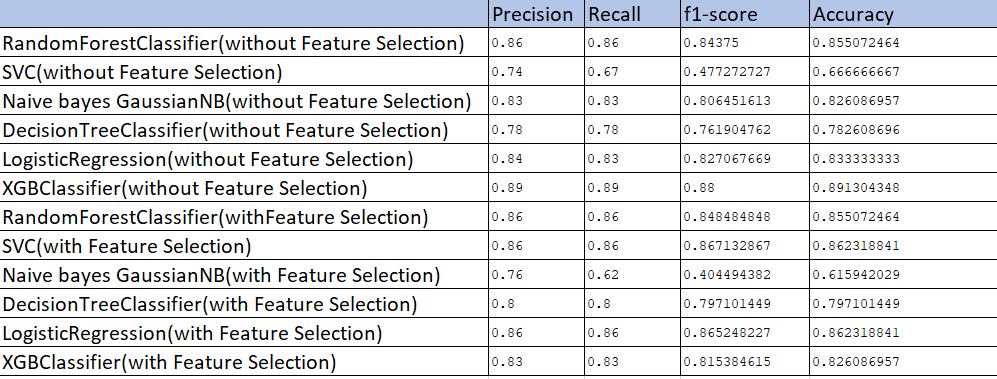


In [125]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


parameters =    {
            'max_depth': [100,1000,2000,3000,4000],
            'learning_rate': [0.2, 0.3,0.4,0.5],
            'n_estimators': [100, 150,200,300,400],
            'gamma': [0, 0.1, 0.2],
            'subsample': [0.7, 0.8, 0.9, 1],
            }

xgb_model = xgb.XGBClassifier(random_state = 0)

clf = GridSearchCV(xgb_model, parameters, scoring = 'f1_micro', n_jobs = -1, cv = 10)

clf.fit(X_train, y_train)

model = clf.best_estimator_

In [127]:
best_score = clf.best_score_
best_parameters = clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_score*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.17 %
Best Parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 100, 'n_estimators': 150, 'subsample': 1}


In [128]:
xgb_model = xgb.XGBClassifier(learning_rate=0.2,gamma=0,max_depth=100,subsample= 1,random_state = 0)

In [129]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
print(classification_report(y_test,xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        74
           1       0.92      0.86      0.89        64

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



In [134]:
print(accuracy_score(y_test,xgb_model.predict(X_test)))

0.8985507246376812


In [135]:
print(f1_score(y_test,xgb_model.predict(X_test)))

0.8870967741935484


In [140]:
cv_scores = cross_val_score(xgb_model,X_train,y_train,cv=10, scoring='f1_micro')
print(" cvscore : {} ".format(np.mean((cv_scores))) )

 cvscore : 0.8725925925925926 
